<a href="https://colab.research.google.com/github/JotaPedroso/Machine-Learning/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input


In [ ]:
(X_train, _), (X_teste, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train[4].shape

(28, 28)

In [ ]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X_train = X_train.astype("float32") / 255.0 #Normalização dos dados
X_teste = X_teste.astype("float32") / 255.0


In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) # Transformação dos dados de treino e teste
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:]))) # de duas dimensões para apenas uma (2D -> 1D)

In [ ]:
X_train_noisy = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) #Atribuição de ruido nos dados
X_teste_noisy = X_teste + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_teste.shape)

In [ ]:
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0) # Limitação dos dados entre 0 e 1
X_teste_noisy = np.clip(X_teste_noisy, 0.0, 1.0)

In [ ]:
inputs = Input(shape=(784,))
encoder = Dense(32, activation="relu")(inputs) #Encoder comprime a imagem e Decoder descomprime sucessivamente
decorder = Dense(784, activation="sigmoid")(encoder)
autoencoder = Model(inputs, decorder)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_teste_noisy, X_teste)) #Treinamento com os dados com ruido e os dados originais

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3678 - val_loss: 0.2187
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2090 - val_loss: 0.1809
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1764 - val_loss: 0.1619
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1602 - val_loss: 0.1489
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1482 - val_loss: 0.1416
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1412 - val_loss: 0.1360
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1364 - val_loss: 0.1323
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1328 - val_loss: 0.1299
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1306 - val_loss: 0.1283
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1290 - val_loss: 0.1273
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1283 - val_loss: 0.1268
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
idx = np.random.randint(X_teste.shape[0]) #Escolhe um índice aleatório dentro do conjunto de teste.
original_image = X_teste[idx] # pega uma imagem original do teste (sem ruído).

noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape) #Geração de ruido
noisy_image = np.clip(noisy_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))

denoised_image = denoised_image.reshape(28, 28)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


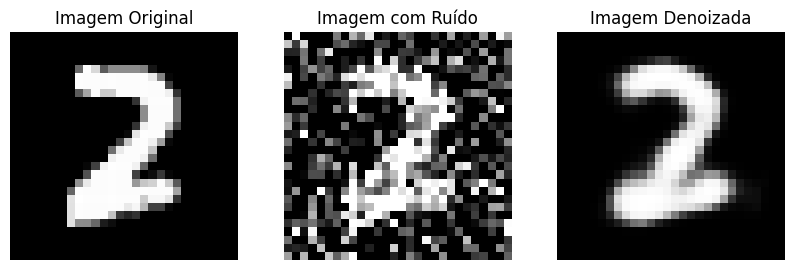

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title('Imagem Original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image.reshape(28, 28), cmap='gray')
plt.title('Imagem com Ruído')
plt.axis("off")


plt.subplot(1, 3, 3)
plt.imshow(denoised_image.reshape(28, 28), cmap='gray')
plt.title('Imagem Denoizada')
plt.axis("off")


plt.show()